In [1]:
# import libraries
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

# load the data
mnist = input_data.read_data_sets('data/MNIST/', one_hot=True)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [2]:
def weight_variable(shape):
    # initialize weights, normalize it to make it easier to converge
    initial = tf.truncated_normal(shape, stddev = 0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    # not 0 in case of never being activated
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides = [1, 1, 1, 1], padding = 'SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME')

In [3]:
def cnn(x):
    # return the logits
    
    # [None, 784] ==> [None, 28, 28, 1]
    x_image = tf.reshape(x, [-1, 28, 28, 1])

    # convolutional layer 1
    conv1_w = weight_variable([5, 5, 1, 32])
    conv1_b = bias_variable([32])

    conv1 = tf.nn.relu(conv2d(x_image, conv1_w) + conv1_b)
    conv1 = max_pool_2x2(conv1)

    # convolutional layer 2
    conv2_w = weight_variable([5, 5, 32, 64])
    conv2_b = bias_variable([64])

    conv2 = tf.nn.relu(conv2d(conv1, conv2_w) + conv2_b)
    conv2 = max_pool_2x2(conv2)

    # flatten layer
    fcl_w = weight_variable([7 * 7 * 64, 1024])
    fcl_b = bias_variable([1024])

    flatten = tf.reshape(conv2, [-1, 7 * 7 * 64])
    fcl = tf.nn.relu(tf.matmul(flatten, fcl_w) + fcl_b)

    # dropout layer
    fc1 = tf.nn.dropout(fcl, keep_prob)

    # output layer
    fc2_w = weight_variable([1024, 10])
    fc2_b = bias_variable([10])

    logits = tf.nn.softmax(tf.matmul(fc1, fc2_w) + fc2_b)
    
    return logits

In [4]:
# create placeholders
x = tf.placeholder(tf.float32, shape = [None, 784], name='x')
y_ = tf.placeholder(tf.float32, shape = [None, 10], name='y')
keep_prob = tf.placeholder(tf.float32, name='keep_prob')
logits = cnn(x)
logits = tf.identity(logits, name='logits')

In [5]:
# training and evaluation operations
cross_entropy = -tf.reduce_sum(y_*tf.log(logits))
train_op = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"), name='accuracy')

In [6]:
# train the CNN
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(2000):
        batch = mnist.train.next_batch(64)
        if i % 100 == 0:
            train_accuracy = accuracy.eval(feed_dict = {x:batch[0], y_: batch[1], keep_prob: 1.0})
            print("iter: %d, training accuracy: %g" % (i, train_accuracy))
        train_op.run(feed_dict = {x: batch[0], y_: batch[1], keep_prob: 0.7})
    print("test accuracy: %g" % accuracy.eval(feed_dict = {x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))
    # save the model
    saver = tf.train.Saver()
    tf.add_to_collection('predict_op', logits)
    tf.add_to_collection('hparams', x)
    tf.add_to_collection('hparams', keep_prob)
    saver.save(sess, './cnn_data')
    #saver.save(sess, 'cnn_model',global_step=1000)
    print("Model saved")

iter: 0, training accuracy: 0.078125
iter: 100, training accuracy: 0.9375
iter: 200, training accuracy: 0.875
iter: 300, training accuracy: 0.90625
iter: 400, training accuracy: 0.890625
iter: 500, training accuracy: 0.90625
iter: 600, training accuracy: 0.953125
iter: 700, training accuracy: 0.984375
iter: 800, training accuracy: 0.90625
iter: 900, training accuracy: 0.96875
iter: 1000, training accuracy: 0.953125
iter: 1100, training accuracy: 0.96875
iter: 1200, training accuracy: 0.984375
iter: 1300, training accuracy: 0.96875
iter: 1400, training accuracy: 0.953125
iter: 1500, training accuracy: 0.984375
iter: 1600, training accuracy: 1
iter: 1700, training accuracy: 0.984375
iter: 1800, training accuracy: 0.984375
iter: 1900, training accuracy: 0.984375
test accuracy: 0.9785
Model saved


## This model has nearly 98% correction in test. But it requires that the input is [None,784]

In [1]:
import tensorflow as tf
#from tensorflow.examples.tutorials.mnist import input_data
#mnist = input_data.read_data_sets('data/MNIST/', one_hot=True)

In [4]:
loaded_graph = tf.Graph()
with tf.Session() as sess:
    new_saver = tf.train.import_meta_graph('./cnn_data.meta')
    new_saver.restore(sess, './cnn_data')
    
#     loaded_x = loaded_graph.get_tensor_by_name('x:0')
#     loaded_y = loaded_graph.get_tensor_by_name('y:0')
#     loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
#     loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
#     loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
    predict_op = tf.get_collection('predict_op')[0]
    sess.run(train_op,feed_dict = {x: batch[0], y_: batch[1], keep_prob: 0.7})
    #print("test accuracy: %g" % loadedacc.eval(feed_dict = {loaded_x: mnist.test.images, loaded_y: mnist.test.labels, loaded_keep_prob: 1.0}))

NameError: name 'train_op' is not defined

# time to identify some numbers

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

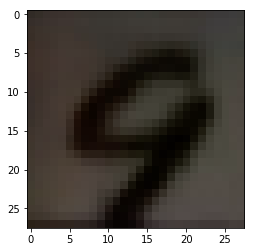

In [3]:
test_1 = cv2.imread('test_images/test_1.jpg')
test_1 = cv2.resize(test_1, (28,28))
plt.imshow(test_1)

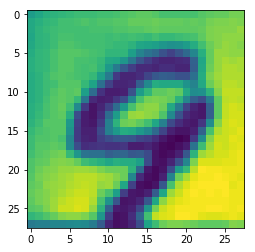

In [4]:
gray = cv2.cvtColor(test_1, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

In [5]:
def white_background(img):
    # BGR image input
    b_thresh = 35
    g_thresh = 35
    r_thresh = 55
    
    r_channel = img[:,:,2]
    g_channel = img[:,:,1]
    b_channel = img[:,:,0]
    
    my_image = img.copy()
    
    # mask the white area
    binary_mask = np.zeros_like(r_channel)
    binary_mask[((r_channel > r_thresh) | (g_channel > g_thresh) | (b_channel > b_thresh))] = 1
    
    # make white area white
    my_image[binary_mask == 1] = 255
    
    return my_image

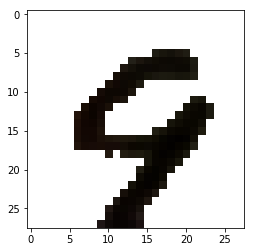

In [6]:
my_image = white_background(test_1)
plt.imshow(my_image)

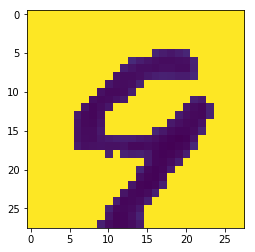

In [7]:
gray = cv2.cvtColor(my_image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

In [8]:
def gray_white(gray, thresh=50):
    binary_mask = np.zeros_like(gray)
    binary_mask[gray > thresh] = 1
    #print(gray.max(), gray.min())
    #plt.imshow(binary_mask)
    my_gray = gray.copy()
    my_gray[binary_mask == 1] = 255
    return my_gray

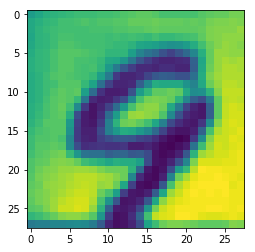

In [9]:
gray = cv2.cvtColor(test_1, cv2.COLOR_BGR2GRAY)
white_gray = gray_white(gray, 255)
plt.imshow(white_gray)

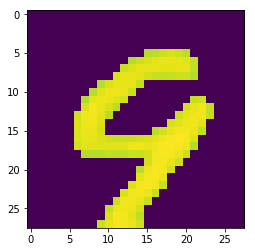

In [10]:
temp_gray = cv2.cvtColor(test_1, cv2.COLOR_BGR2GRAY)
temp_gray = gray_white(temp_gray, 30)
temp_gray = cv2.bitwise_not(temp_gray)
plt.imshow(temp_gray)

In [11]:
batch = mnist.train.next_batch(64)

NameError: name 'mnist' is not defined

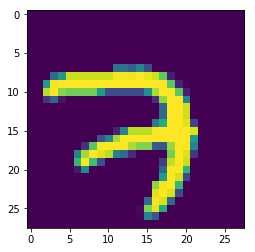

In [21]:
img_1 = np.reshape(batch[0][0], [28, 28])
img_2 = np.reshape(batch[0][1], [28, 28])
plt.imshow(img_1)

In [12]:
# def process_image(img):
#     img = cv2.resize(img, (28,28))
#     img = white_background(img)
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     gray = gray - 255
#     return gray
def process_image(img):
    img = cv2.resize(img, (28,28))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = gray_white(gray, 40)
    gray = cv2.bitwise_not(gray)
    return gray

In [13]:
test_1 = cv2.imread('test_images/test_1.jpg')
test_2 = cv2.imread('test_images/test_2.jpg')
test_3 = cv2.imread('test_images/test_3.jpg')
test_4 = cv2.imread('test_images/test_4.jpg')
test_5 = cv2.imread('test_images/test_5.jpg')
processed_1 = process_image(test_1)
processed_2 = process_image(test_2)
processed_3 = process_image(test_3)
processed_4 = process_image(test_4)
processed_5 = process_image(test_5)
array_1 = processed_1.reshape(-1)
array_2 = processed_2.reshape(-1)
array_3 = processed_3.reshape(-1)
array_4 = processed_4.reshape(-1)
array_5 = processed_5.reshape(-1)
my_array = np.vstack((array_1, array_2, array_3, array_4, array_5))
my_array.shape

(5, 784)

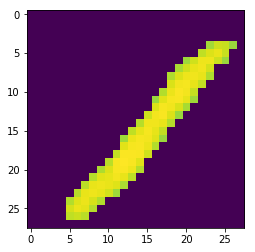

In [18]:
plt.imshow(processed_5)

In [15]:
loaded_graph = tf.Graph()
with tf.Session() as sess:
    new_saver = tf.train.import_meta_graph('./cnn_data.meta')
    new_saver.restore(sess, './cnn_data')
    predict_op = tf.get_collection('predict_op')[0]
    hparams = tf.get_collection("hparams")
    x = hparams[0]
    keep_prob = hparams[1]
    predicted_logits = sess.run(predict_op,feed_dict = {x: my_array, keep_prob: 1.0})

In [16]:
np.argmax(predicted_logits, axis=1)

array([9, 5, 8, 5, 7])

### 9,5,8,6,1 correct

In [27]:
predicted_logits

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.]], dtype=float32)